In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
negative_file = pd.read_table("windows_negative_left_51.txt", header=None)
positive_file = pd.read_table("windows_positive_left_51.txt", header=None)

In [ ]:
negative_file.head(5)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
positive_file.head(5)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,2,5,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0
2,8,0,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,1,1,0,...,4,0,0,0,0,0,2,0,0,0


In [ ]:
len(negative_file)

2092

In [ ]:
array_positive = np.ones(len(positive_file), dtype=int)
array_negative = np.zeros(len(negative_file), dtype=int)

In [ ]:
negative_file['target'] = array_negative
positive_file['target'] = array_positive

In [ ]:
negative_file.head(5)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
positive_file.head(5)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,target
0,2,5,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,1
2,8,0,0,2,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,2,0,0,0,1


In [ ]:
df = pd.concat([positive_file, negative_file])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
X = df.drop(columns=['target'])

In [ ]:
y = df['target']

# Cross - Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.7734225621414914

In [ ]:
f1_score(y_pred, y_test)

0.7613293051359515

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_r = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred_r = clf_r.predict(X_test)

In [ ]:
f1_score(y_pred_r, y_test)

0.6306098964326812

# Naive Bayess

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
y_pred_n = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
f1_score(y_pred_n, y_test)

0.5948592411260709

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_pred_neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)

In [ ]:
f1_score(y_pred_neigh, y_test)

0.6552119129438717

# Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
y_pred_boost = XGBClassifier().fit(X_train, y_train).predict(X_test)

In [ ]:
f1_score(y_pred_boost, y_test)

0.7857829010566763

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
y_pred_cat = CatBoostClassifier().fit(X_train, y_train).predict(X_test)

In [ ]:
f1_score(y_pred_cat, y_test)

0.7902439024390244

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([1.94603125e-01, 1.54519320e-01, 8.01558658e-02, 7.40923667e-02,
       6.57103638e-02, 6.01694683e-02, 5.59806282e-02, 3.94616065e-02,
       2.98112992e-02, 2.16544873e-02, 1.99191429e-02, 1.95959182e-02,
       1.56237965e-02, 1.43040574e-02, 1.25549453e-02, 1.19735617e-02,
       1.12996199e-02, 9.76529228e-03, 9.34764325e-03, 8.56897757e-03,
       7.72189449e-03, 7.15072528e-03, 5.80184554e-03, 4.76095879e-03,
       4.29492950e-03, 4.18136553e-03, 4.13147997e-03, 3.82776727e-03,
       3.71670658e-03, 3.62673418e-03, 3.08992482e-03, 2.96411970e-03,
       2.71466986e-03, 2.57604711e-03, 2.33780098e-03, 2.20171964e-03,
       2.00859103e-03, 1.90562765e-03, 1.77936243e-03, 1.64384689e-03,
       1.52266854e-03, 1.46610729e-03, 1.32420437e-03, 1.23735207e-03,
       1.16688470e-03, 1.06126295e-03, 9.04707661e-04, 7.81865126e-04,
       7.05096916e-04, 6.76341850e-04, 6.01602236e-04, 5.57991723e-04,
       5.31552901e-04, 5.10832808e-04, 4.25410681e-04, 3.89138792e-04,
      

In [ ]:
pca_trans = pca.transform(X)

In [ ]:
PC1 = pca_trans[:,0]
PC2 = pca_trans[:,1]

In [ ]:
df["target"]

0       1
1       1
2       1
3       1
4       1
       ..
2087    0
2088    0
2089    0
2090    0
2091    0
Name: target, Length: 4184, dtype: int64

In [ ]:
labels=[]
 
for points in df.target:
    labels.append(df.target[points])
zipped = list(zip(PC1, 
                  PC2, 
                  df.target,
                  labels))
 
pc_df = pd.DataFrame(zipped, 
                     columns=['PC1', 
                              'PC2', 
                              'Target',
                              'Label'])
 
pc_df.head(6)

,PC1,PC2,Target,Label
0,-0.537585,4.259987,1,"1 1 1 0 Name: target, dtype: int64"
1,-1.083268,-0.466609,1,"1 1 1 0 Name: target, dtype: int64"
2,0.819138,8.348845,1,"1 1 1 0 Name: target, dtype: int64"
3,-0.154956,-0.691416,1,"1 1 1 0 Name: target, dtype: int64"
4,1.451121,0.914911,1,"1 1 1 0 Name: target, dtype: int64"
5,2.806039,-0.653525,1,"1 1 1 0 Name: target, dtype: int64"


In [ ]:
pc_df.loc[pc_df['Target'] == 1, 'Label'] = 'positive' 
pc_df.loc[pc_df['Target'] == 0, 'Label'] = 'negative' 

In [ ]:
pc_df

,PC1,PC2,Target,Label
0,-0.537585,4.259987,1,positive
1,-1.083268,-0.466609,1,positive
2,0.819138,8.348845,1,positive
3,-0.154956,-0.691416,1,positive
4,1.451121,0.914911,1,positive
...,...,...,...,...
4179,-1.318440,-0.489592,0,negative
4180,-1.388594,-0.479503,0,negative
4181,-1.366254,-0.432823,0,negative
4182,-1.388594,-0.479503,0,negative


In [ ]:
PC1_m = pc_df.loc[pc_df["Target"] == 0,
                "PC1"]
PC2_m = pc_df.loc[pc_df["Target"] == 0,
                "PC2"]
 
PC1_b = pc_df.loc[pc_df["Target"] == 1,
                "PC1"]
PC2_b = pc_df.loc[pc_df["Target"] == 1,
                "PC2"]

Text(0, 0.5, 'Second Principal Component')

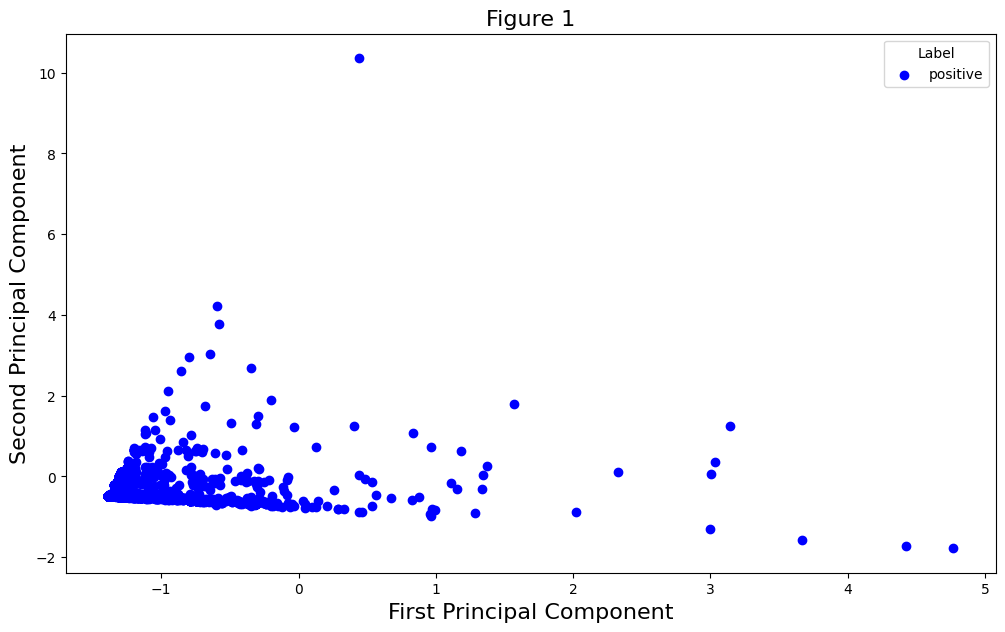

In [ ]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
 
ax.scatter(PC1_m, 
            PC2_m, 
            c="blue",
           label="positive")
 
# ax.scatter(PC1_b, 
#             PC2_b, 
#             c="orange",
#            label="negative")
 
ax.legend(title="Label")
 
plt.title("Figure 1",
          fontsize=16)
plt.xlabel('First Principal Component',
           fontsize=16)
plt.ylabel('Second Principal Component',
           fontsize=16)

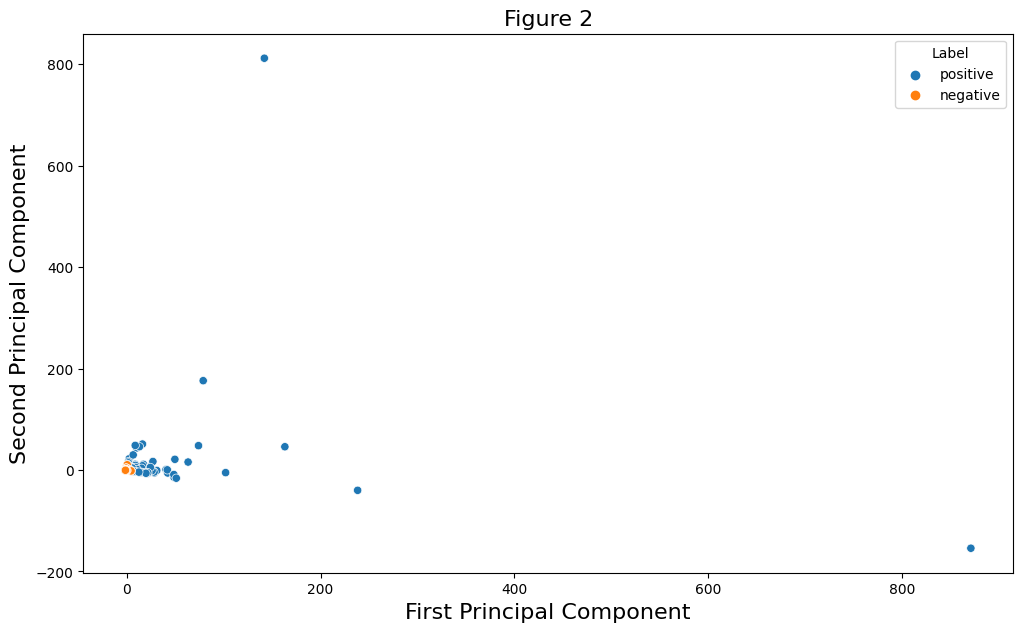

In [ ]:
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=pc_df, 
                x="PC1", 
                y="PC2", 
                hue="Label")
 
plt.title("Figure 2",
          fontsize=16)
plt.xlabel('First Principal Component',
           fontsize=16)
plt.ylabel('Second Principal Component',
           fontsize=16)
plt.savefig('plot.png')